In [1]:
import os
import pathlib

import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Bidirectional
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
del mnist

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)
x_train = (X_train.reshape(-1, 1,784) / 255).astype(np.float32)
x_val = (X_val.reshape(-1, 1,784) / 255).astype(np.float32)
x_test = (X_test.reshape(-1, 1,784) / 255).astype(np.float32)
y_test = Y_test

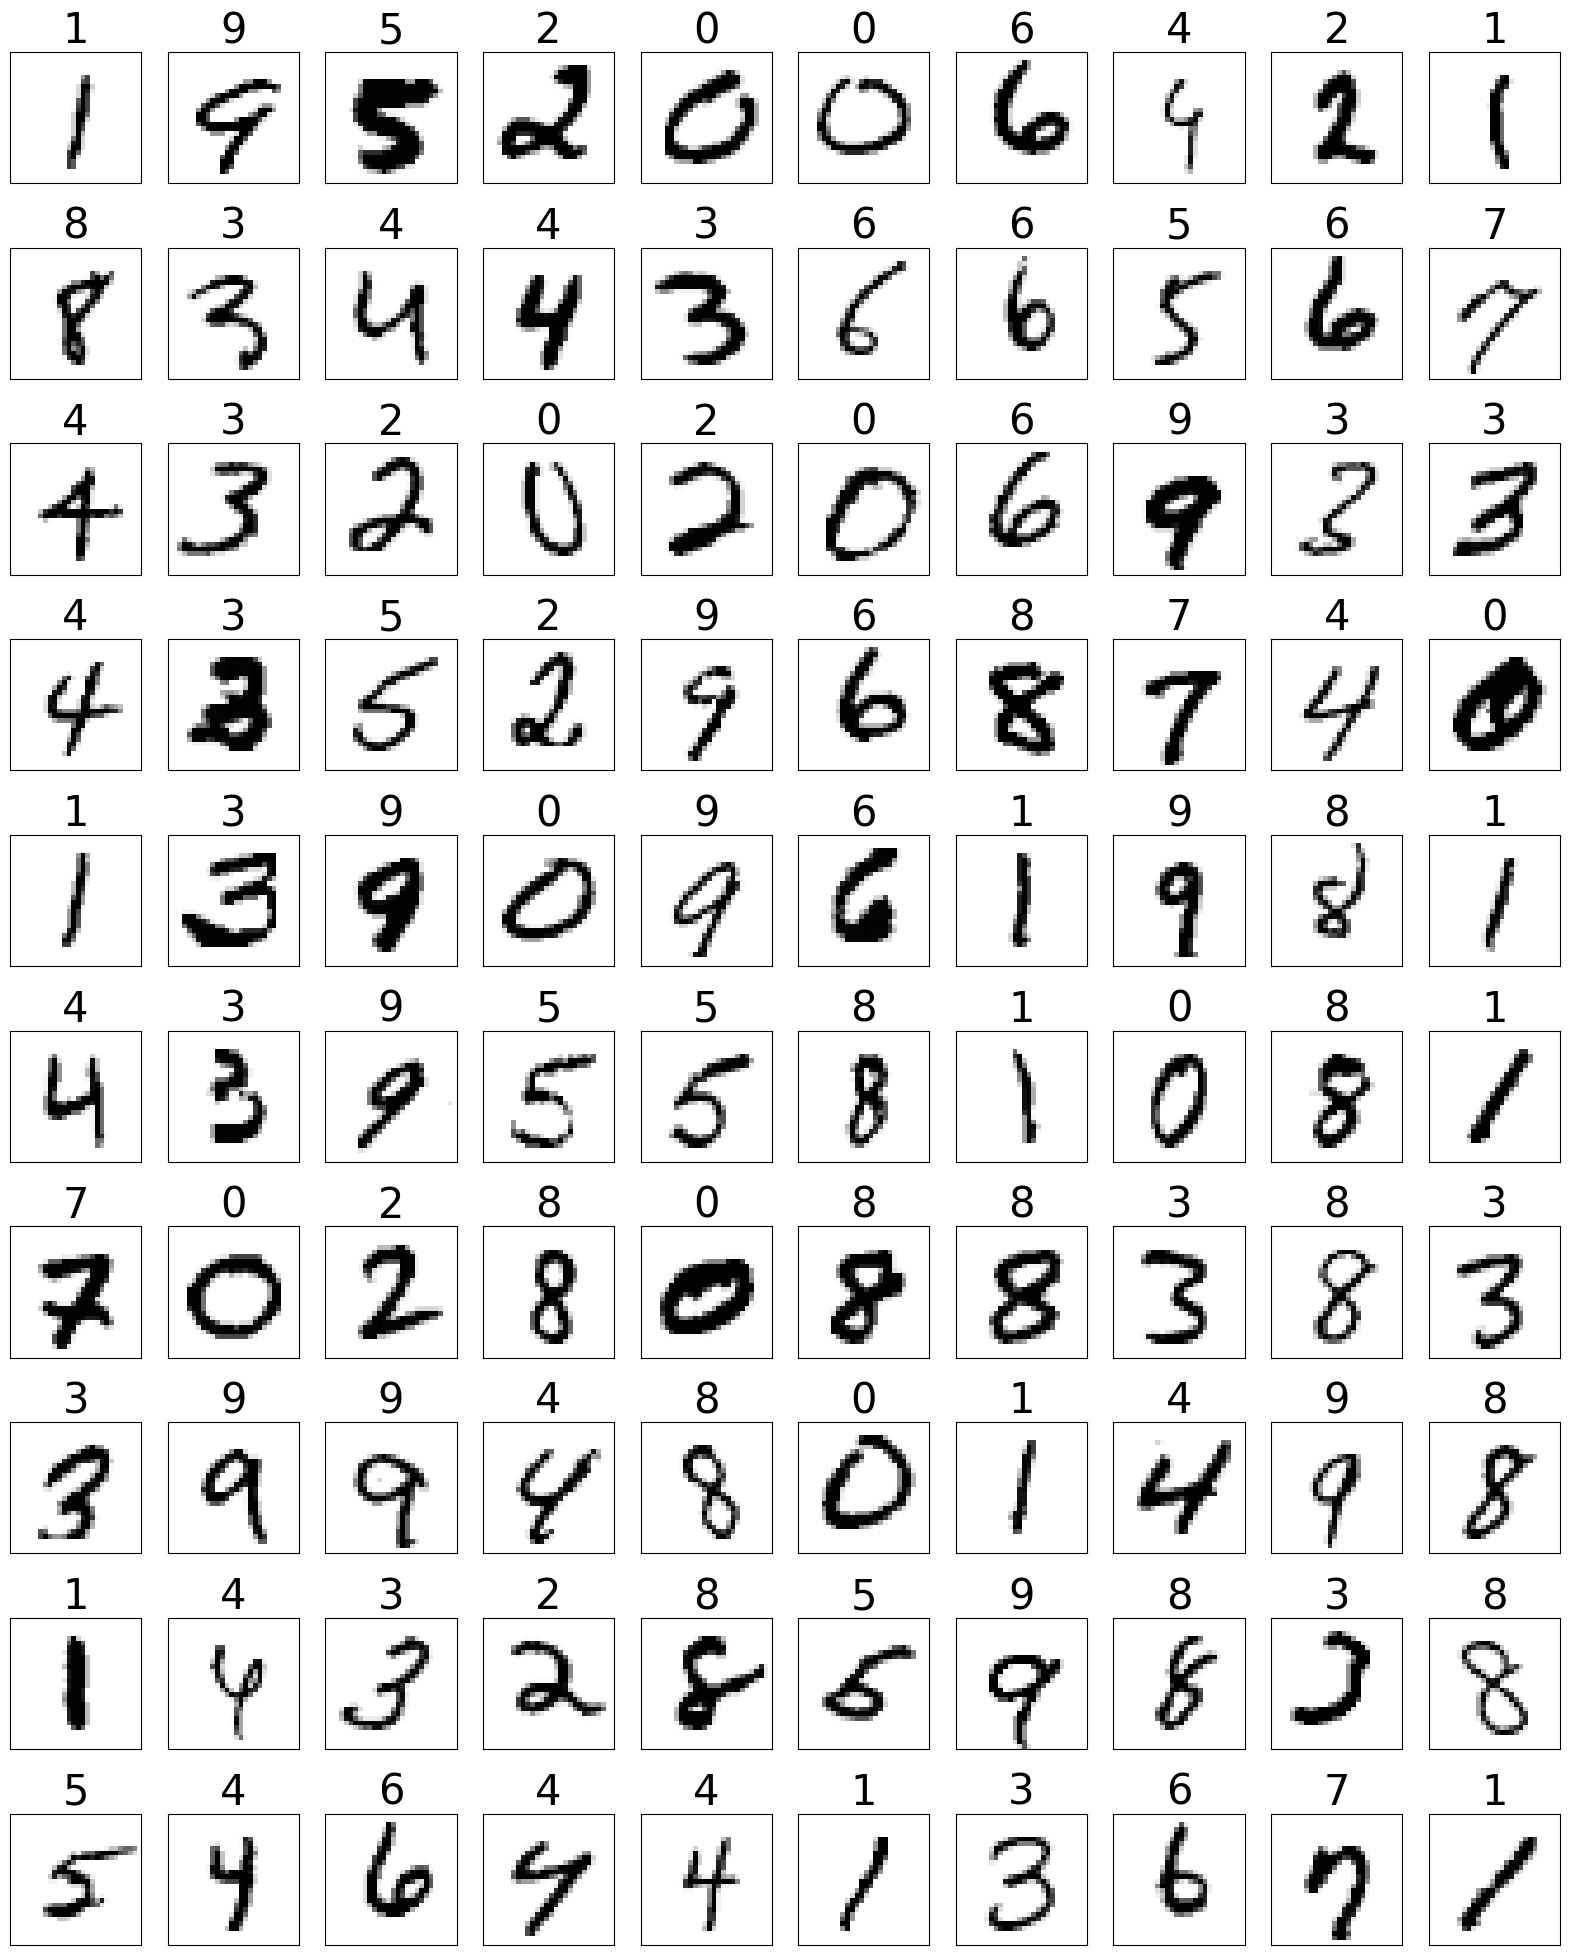

In [4]:
# 特徴のある時系列データに0~9の番号を割り振っています
# 
fig, ax = plt.subplots(10, 10,figsize=(20, 25))
for i in range(0,100):
    r = i // 10
    c = i %  10
    ax[r,c].set_xticks([])
    ax[r,c].set_yticks([])
    ax[r,c].set_title(y_train[i],fontsize=30)
    ax[r,c].imshow(X_train[i], cmap='Greys')
    #ax[r,c].plot(range(len(x_train[i][0])), x_train[i][0])
plt.show()

# 演習内容
各々の特徴を持つデータに0~9の番号を割り振りました。

|変数名| データの用途|
| -- | -- |
|x_train|教師データ 学習用(入力)|
| Y_train | 教師データ 学習用(結果) |
|x_val|教師データ 評価用(入力)|
| Y_val | 教師データ 評価用(結果) |
|x_test|検証データ(入力)|
| Y_test | 検証データ(結果) |

LSTMのニューラルネットワークを構築し、教師データで学習を行って検証データの分析を行ってください。

In [5]:
model = Sequential()
model.add(GRU(25, activation='tanh',
                                 recurrent_activation='sigmoid',
                                 kernel_initializer='glorot_normal',
                                 recurrent_initializer='orthogonal'))
model.add(Dense(10, kernel_initializer='glorot_normal',
                    activation='softmax')) # softmax
optimizer = optimizers.Adam(learning_rate=0.001,
                                beta_1=0.9, beta_2=0.999, amsgrad=True)

model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                       patience=10,
                       verbose=1)

hist = model.fit(x_train, y_train,
                     epochs=1000, batch_size=100,
                     verbose=2,
                     validation_data=(x_val, y_val),
                     callbacks=[es])

Epoch 1/1000
480/480 - 3s - loss: 0.5625 - accuracy: 0.8614 - val_loss: 0.3190 - val_accuracy: 0.9120 - 3s/epoch - 7ms/step
Epoch 2/1000
480/480 - 1s - loss: 0.2647 - accuracy: 0.9268 - val_loss: 0.2482 - val_accuracy: 0.9302 - 1s/epoch - 2ms/step
Epoch 3/1000
480/480 - 1s - loss: 0.2114 - accuracy: 0.9395 - val_loss: 0.2135 - val_accuracy: 0.9406 - 1s/epoch - 2ms/step
Epoch 4/1000
480/480 - 1s - loss: 0.1780 - accuracy: 0.9496 - val_loss: 0.1928 - val_accuracy: 0.9454 - 1s/epoch - 2ms/step
Epoch 5/1000
480/480 - 1s - loss: 0.1552 - accuracy: 0.9553 - val_loss: 0.1796 - val_accuracy: 0.9481 - 1s/epoch - 2ms/step
Epoch 6/1000
480/480 - 1s - loss: 0.1380 - accuracy: 0.9607 - val_loss: 0.1691 - val_accuracy: 0.9511 - 1s/epoch - 2ms/step
Epoch 7/1000
480/480 - 1s - loss: 0.1237 - accuracy: 0.9653 - val_loss: 0.1615 - val_accuracy: 0.9546 - 969ms/epoch - 2ms/step
Epoch 8/1000
480/480 - 1s - loss: 0.1127 - accuracy: 0.9679 - val_loss: 0.1541 - val_accuracy: 0.9553 - 984ms/epoch - 2ms/step
Ep

In [6]:
z = model.predict(x_test)

313/313 [==============================] - 1s 988us/step


In [7]:
z[1]

array([5.8996966e-07, 2.9100428e-04, 9.9938619e-01, 1.3010475e-05,
       4.4432610e-11, 4.4997878e-06, 2.9980481e-04, 8.4477980e-11,
       4.8491943e-06, 4.8029341e-12], dtype=float32)

In [8]:
np.argmax(z[1])

2

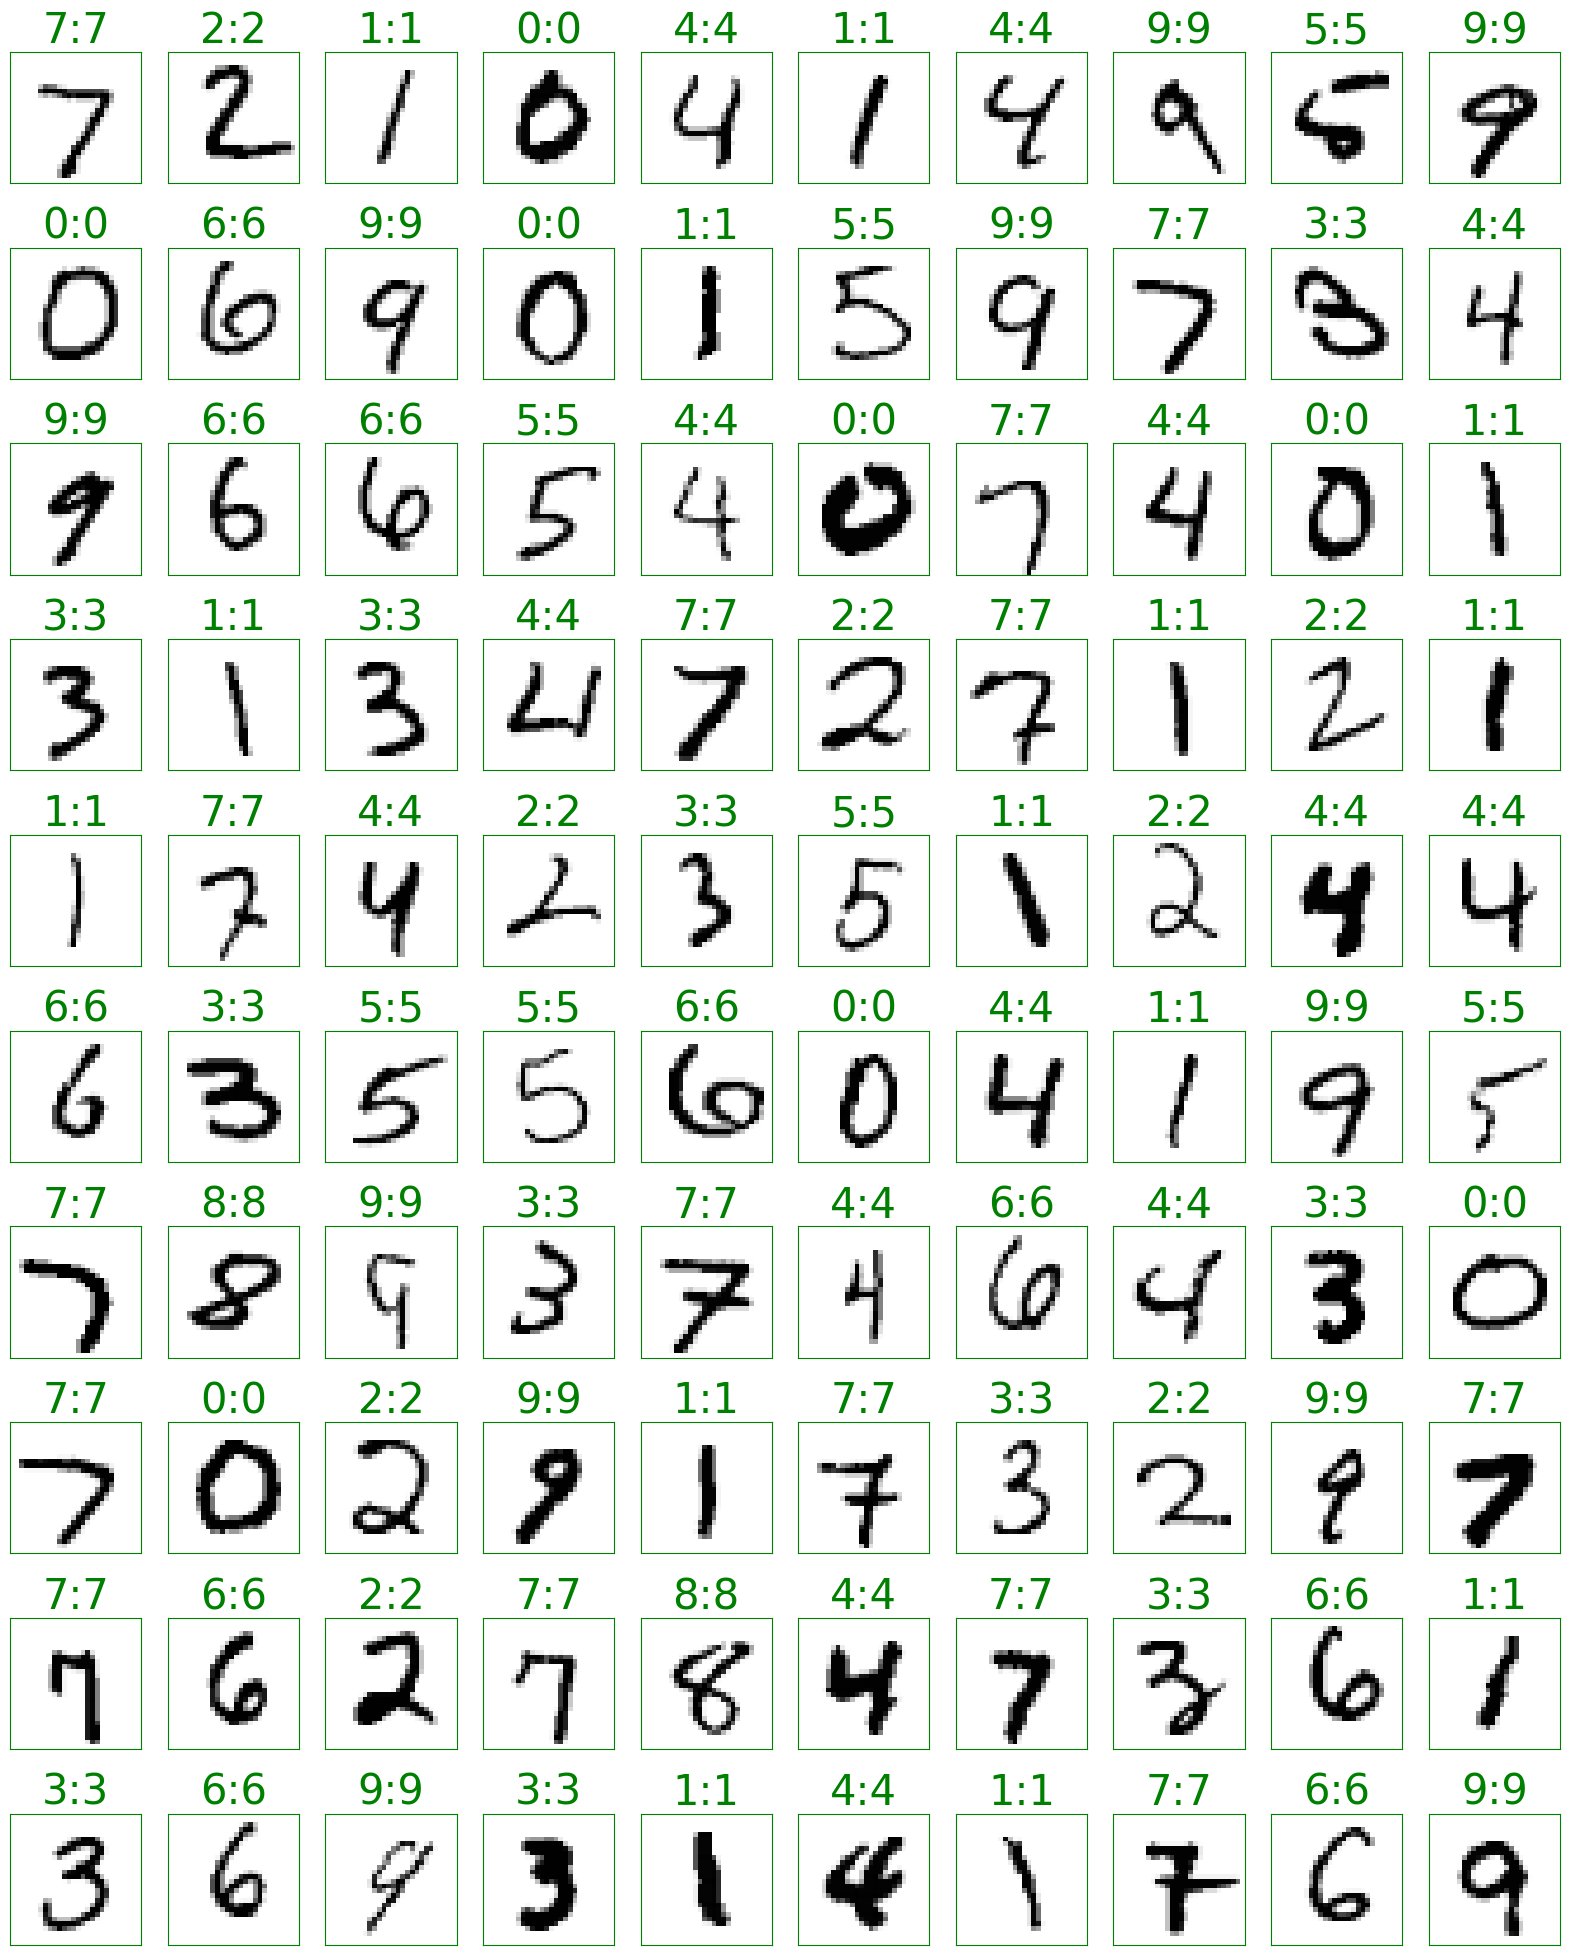

In [9]:
fig, ax = plt.subplots(10, 10,figsize=(20, 25))
for i in range(0,100):
    r = i // 10
    c = i %  10
    t1 = y_test[i]
    t2 = np.argmax(z[i])
    ax[r,c].set_xticks([])
    ax[r,c].set_yticks([])
    if t1 == t2:
        ax[r,c].set_title(str(t1)+":"+str(t2),fontsize=30, color='green')
        ax[r,c].spines['top'].set_color('green')
        ax[r,c].spines['bottom'].set_color('green')
        ax[r,c].spines['left'].set_color('green')
        ax[r,c].spines['right'].set_color('green')
    else:
        ax[r,c].set_title(str(t1)+":"+str(t2),fontsize=30, color='red')
        ax[r,c].spines['top'].set_color('red')
        ax[r,c].spines['bottom'].set_color('red')
        ax[r,c].spines['left'].set_color('red')
        ax[r,c].spines['right'].set_color('red')
    ax[r,c].imshow(X_test[i], cmap='Greys')
    #ax[r,c].plot(range(len(x_test[i][0])), x_test[i][0])
plt.show()

In [10]:
err=[]
for i in range(0,z.shape[0]):
    if y_test[i] != np.argmax(z[i]):
        err.append(i)
